In [ ]:
!pip install cartopy geoplot ipyleaflet geemap

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lats = np.load('lats.npy')
lons = np.load('lons.npy')
data = np.load('data.npy')

# 1. Cartopy

In [ ]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

<ipython-input-15-56183139f0fe>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(lon,lat,  'bo', markersize=6, color = 'red', transform=ccrs.Geodetic())


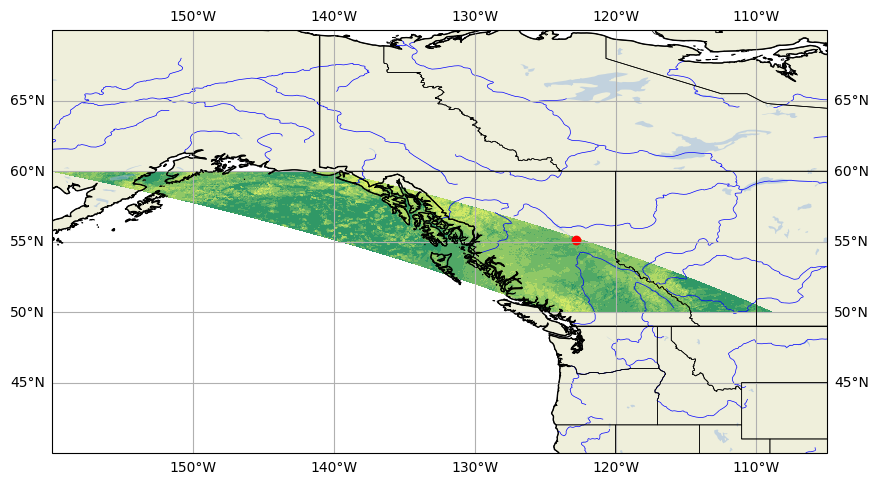

In [ ]:
proj = ccrs.PlateCarree()

lon, lat = -122.8414, 55.1119

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 20))

ax.set_extent([-160, -105, 40 ,70], crs=ccrs.PlateCarree())


#ax.set_facecolor(cfeature.COLORS['water'])

plt.contourf(lons, lats, data,
             transform=ccrs.PlateCarree(), cmap = 'summer')

ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
#ax.add_feature(regions, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.LAKES,  alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax.add_feature(cartopy.feature.RIVERS, edgecolor='blue', linewidth=0.5)
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces',
            scale='10m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle = '-', linewidth=0.5)

ax.gridlines(draw_labels=True)

ax.plot(lon,lat,  'bo', markersize=6, color = 'red', transform=ccrs.Geodetic())

#2. Folium

In [ ]:
import folium

In [155]:
import geopandas as gpd
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [156]:
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [ ]:
map = folium.Map(zoom_start=4, tiles="Cartodb Positron")
gdf_json = df.to_json()

folium.GeoJson(gdf_json).add_to(map)
map

# 3. Plotly

In [157]:
import plotly.express as px

fig = px.choropleth(df, locations='iso_a3', hover_name='name', color='gdp_md_est',
                    projection='natural earth')
fig.show()

# 4. ipyleaflet

In [18]:
import xarray as xr

data = xr.load_dataset('era5.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 2, latitude: 2, time: 8760)
Coordinates:
  * longitude  (longitude) float32 59.5 59.75
  * latitude   (latitude) float32 57.25 57.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 -2.704 -2.49 ... 1.919 1.929
    v10        (time, latitude, longitude) float32 0.6954 0.7257 ... 2.715 2.538
    d2m        (time, latitude, longitude) float32 252.0 251.6 ... 263.7 263.8
    t2m        (time, latitude, longitude) float32 254.6 254.2 ... 265.4 265.5
    e          (time, latitude, longitude) float32 -4.113e-07 ... 2.189e-06
    cvh        (time, latitude, longitude) float32 0.9872 0.8446 ... 0.7416
    cvl        (time, latitude, longitude) float32 0.01216 0.1429 ... 0.2584
    skt        (time, latitude, longitude) float32 253.5 252.9 ... 263.2 263.1
    ssr        (time, latitude, longitude) float32 0.125 0.125 ... 0.125 0.125
    sp         (time, latitude, longitude) float32 9.913e+04 ... 9.705e+04
    tcrw       (time, latitude, longitude) float32 -7.451e-09 ... -7.451e-09
    tp         (time, latitude, longitude) float32 5.678e-06 ... 1.049e-05
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-27 21:07:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [26]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, LayersControl
from ipyleaflet.velocity import Velocity

m = Map(basemap=basemaps.CartoDB.DarkMatter,interpolation='nearest',
    center=(45, 2), zoom=5)
wind = Velocity(data=data.sel(time='2021-01-01T00:00:00.000000000'),
                zonal_speed='u10',
                meridional_speed='v10',
                latitude_dimension='latitude',
                longitude_dimension='longitude',
                velocity_scale=0.01,
                max_velocity=20)
m.add(wind)
m.add_control(LayersControl())
m

Map(center=[45, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [30]:
from ipyleaflet import Map, TileLayer, basemaps
from ipyleaflet.velocity import Velocity
import xarray as xr
import os
import requests

if not os.path.exists('wind-global.nc'):
  url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
  r = requests.get(url)
  wind_data = r.content
  with open('wind-global.nc', 'wb') as f:
      f.write(wind_data)

m = Map(center=(45, 2), zoom=4, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)

ds = xr.open_dataset('wind-global.nc')

wind = Velocity(data=ds,
                zonal_speed='u_wind',
                meridional_speed='v_wind',
                latitude_dimension='lat',
                longitude_dimension='lon',
                velocity_scale=0.01,
                max_velocity=20)
m.add(wind)

m

Map(center=[45, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

# 5. Geemap

In [34]:
import geemap
Map = geemap.Map()
Map.add_basemap("Esri.WorldImagery")
Map.add_basemap("OpenTopoMap")
Map

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=mQ8fFxzm3jWBGPe6oRLSbbwcffvTBZouJcLsvmVM6aE&tc=3XOLB3hdKg21gqZ07ATguLoL6YeOqy-u0TIRpUC0Qcs&cc=JKoq_KVrXNyk71b7NasjlEHn0ISQB13Bs26EGJCqPsU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXlIk9a-F7w3bLmzM1LXrblIrWPMc6z2n5KlHgxe5auRvoEKx3k51f0

Successfully saved authorization token.


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [145]:
import ee
radius = 1250
point=ee.Geometry.Point([19.9, 60.2])
roi = point.buffer(radius)
DW = ee.ImageCollection("GOOGLE/DYNAMICWORLD/V1")\
                  .filterDate(start = '2022-07-08', end='2022-08-30')\
                  .filterBounds(roi)
DW_list = DW.toList(DW.size())

In [151]:
m = geemap.Map(center=[60.2, 19.9], zoom=14)
m.add_basemap('HYBRID')
viz_params = {'bands':'label', 'min':0, 'max':8,
'palette':['419bdf',
    '397d49',
    '88b053',
    '7a87c6',
    'e49635',
    'dfc35a',
    'c4281b',
    'a59b8f',
    'b39fe1']}
m.add_ee_layer(ee.Image(DW_list.get(9)), viz_params)
m.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
display(m)

Map(center=[60.2, 19.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

# RidgeMap

In [152]:
!pip install ridge_map mplcyberpunk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105846 sha256=43fe6ab9b86d279c1370d2193faf1b9906c25e11cdcdb47115c58d9e10696956
  Stored in directory: /root/.cache/pip/wheels/86/8d/be/cafef7d5285bb6b4a7a42ba3fc72b6c9edccb0d02679acb8ea
Successfully built SRTM.py


Creating /root/.cache/srtm
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2

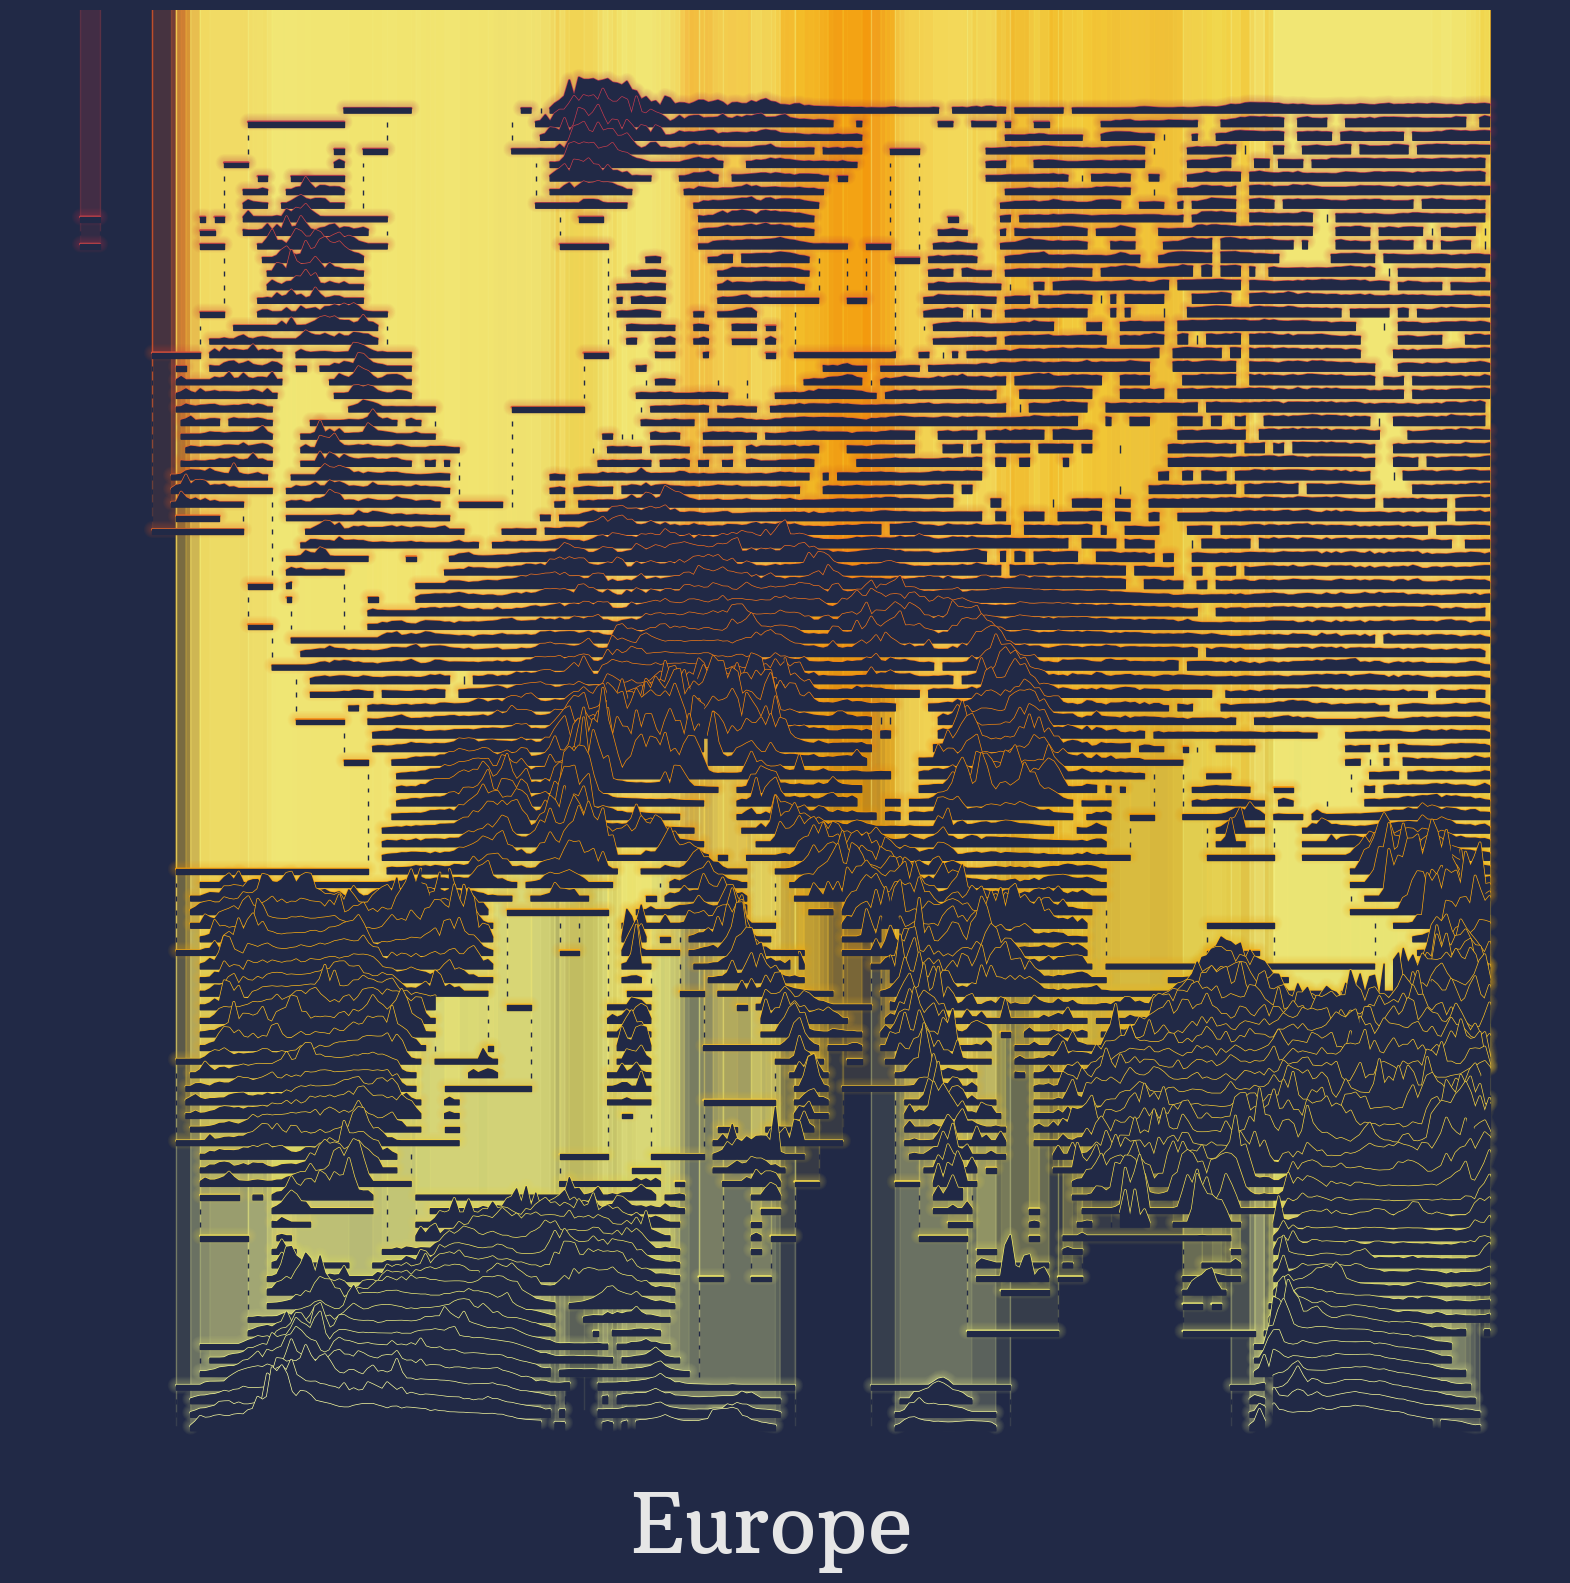

In [153]:
import matplotlib.pyplot as plt
from  ridge_map import FontManager, RidgeMap
import ridge_map as rm
import mplcyberpunk
import matplotlib.font_manager as fm

plt.style.use("cyberpunk")
plt.rcParams["figure.figsize"] = (16,9)

fm = FontManager('https://github.com/google/fonts/blob/main/ofl/arbutusslab/ArbutusSlab-Regular.ttf?raw=true')

r = RidgeMap(bbox=(-15, 32, 45,90), font=fm.prop) #creating a map

values =r.get_elevation_data(num_lines=200) #getting elevation data
values = r.preprocess(values=values, #setting hypoparameters
   water_ntile=70,
   vertical_ratio=40,
   lake_flatness=3)

r.plot_map(values, label="Europe", label_x=0.4,label_y=-0.05, label_size=60, line_color=plt.get_cmap('inferno'), background_color="#212946")
mplcyberpunk.add_glow_effects() #adding glowing